<a href="https://colab.research.google.com/github/BINGQILINGYA/MLtest/blob/main/AssignmentA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Brief: Convolutional Neural Networks in PyTorch  

## Deadline: 03 November 2023, 14:00 GMT

## Number of marks available: 10

In this practical, we will build a convolutional neural network to classify handwritten digits. More specifically, we will use the MNIST dataset to implement and evaluate a neural network-based model for classification of handwritten digits. The main aim is for you to learn, enjoy, and hopefully benefit from it.

You should implement and test your solution in PyTorch.

### Please READ the whole assignment first, before starting to work on it.

### How and what to submit

A. A **Jupyter Notebook** with the code in all the cells executed and outputs displayed.

B. Name your Notebook **COMP61011_AssignmentA2_XXXXXX.ipynb** where XXXXXX is your username such as such as abc18de. Example: `COMP61011_AssignmentA2_abc18de.ipynb`

C. Upload the Jupyter Notebook in B to Blackboard under the **Computing Assignment (pytorch)** submission area before the deadline. **Please pay close attention to submitting to the right place!**

D. **NO DATA UPLOAD**: Please do not upload the data files used in this Notebook. We have a copy already.


### Assessment Criteria

* Being able to use PyTorch to build, train, and evaluate a Convolutional Neural Network for supervised learning.

* Understanding the architecture of a Convolutional Neural Network, and gaining practical experience in designing and training such a network.

* Understanding concepts such as convolution, pooling, and padding, and how they are used in a Convolutional Neural Network. Understanding loss and activation functions.

* Being able to monitor and report the performance of a neural network on a given dataset with respect to accuracy and the chosen loss function.

### Code quality and use of Python libraries
When writing your code, you will find out that there are operations that are repeated at least twice. These operations should be carried out in functions. Furthermore, if your code is unreadable, we may not award marks for that section. Make sure to check the following:

* Did you include Python functions to solve the question and avoid repeating code?
* Did you comment your code to make it readable to others?

Furthermore, please try to avoid using any imports apart from the ones already provided in the Notebook. You can easily install all recommended modules for this assignment by running the following command in your terminal: `python -m pip install -r requirements.txt`


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 10% of the mark each 24 hours the work is late after the deadline. NO late submission will be marked one week after the deadline. Please read [this link](https://wiki.cs.manchester.ac.uk/index.php/UGHandbook23:Main#Late_Submission_of_Coursework_Penalty).

### Use of unfair means

**Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations.** Please carefully read [what constitutes Unfair Means](https://documents.manchester.ac.uk/display.aspx?DocID=2870) if not sure. If you still have questions, please ask your Personal tutor or the Lecturers.

-------------------------------

## Background

Read about convolution and [how 2-D convolution](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) and  [Max-pooling](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) are implemented in PyTorch.

It would help you review the lecture notes to understand how the size of the next layer is computed; you may need to specify these as parameters, rather than them being inferred based on the model specification. Also be sure to understand the difference between `valid` and `same` padding. It'll help to understand how the sizes are affected by strides, padding, etc., in order to implement the network properly.

For further reading on CNNs, you may wish to visit the [CS132n course site](https://cs231n.github.io/convolutional-networks/). For a much more in-depth guide to convolution arithmetic, see [this 2016 paper](https://arxiv.org/pdf/1603.07285v1.pdf).

## Loading the MNIST dataset
For your convenience, the required python modules for this assignment have been provided in `requirements.txt`. You can run the following terminal command to install them: `python -m pip install -r requirements.txt`

A copy of the MNIST dataset is included in PyTorch. We will download it, then load it into memory using the `torchvision` module.

In [1]:
import torch, torchvision, torchsummary
import numpy as np
import matplotlib.pyplot as plt

# The values 0.1307 and 0.3081 used for the Normalize() transformation below are the global mean and standard
# deviation of the MNIST dataset. This is equivalent to scaling all pixel values between [0, 1].
transform = torchvision.transforms.Compose([
              torchvision.transforms.ToTensor(),
              torchvision.transforms.Normalize(
                (0.1307,), (0.3081,))
            ])

train_data = torchvision.datasets.MNIST('', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST('', train=False, download=True, transform=transform)

# We can see some information about this data, including the transform we've applied.
train_data

100%|██████████| 9912422/9912422 [00:00<00:00, 127382420.28it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 28475715.52it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 42413689.59it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 21796943.67it/s]


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

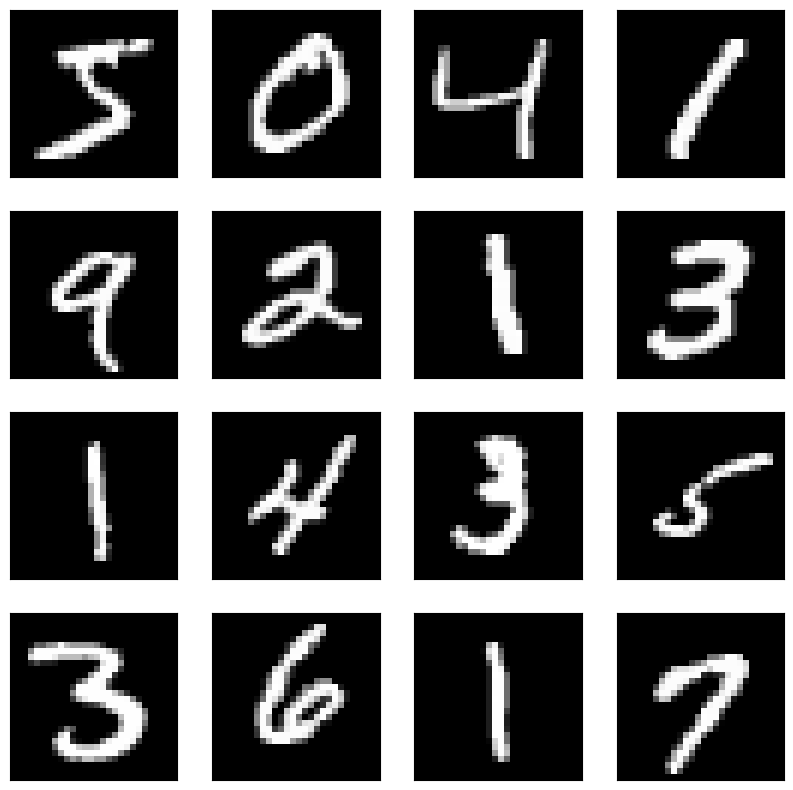

In [2]:
# Visualize the first 16 elements of the training set
fig = plt.figure(figsize=(10, 10))
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.imshow(train_data.data[i], cmap='gray')


## Convolutional Neural Network (3 marks)

Write a CNN class which defines your model.

Below is a suggested CNN configuration, which achieves above 98% accuracy in the training, validation and testing. You could use this suggested configuration, or amend it, as you wish. If you deviate from the below configuration, you **must** include comments explaining your changes.
- The inputs to the first layer should be 28x28x1 images (1 because these are grey scale), and this is the expected input of the model.
- Add a convolutional layer with 25 filters of size 12x12x1 (and the ReLU non-linearity). Use a stride of 2 in both directions, and ensure that there is no padding.
- PyTorch automatically initialises weights in most cases, but to demonstrate how it's done it here, we'll initialise weights as Gaussian random variables with mean 0 and variance 0.0025. For biases we'll initialise everything with a constant 0.1. This is because we're mainly going to be using ReLU non-linearities. **If you use a custom configuration, please ensure that you demonstrate how to manually initialise weights and biases.**
- Add a second convolutional layer with 64 filters of size 5x5x25 that maintains the same width and height. Use stride of 1 in both directions and add padding as necessary, and use the ReLU non-linearity.
- Add a max_pooling layer with pool size 2x2.
- Add a Flatten-type layer: https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html.
- Add a fully connected layer with 1024 units. Each unit in the max_pool should be connected to these 1024 units. Add the ReLU non-linearity to these units.
- Add a Dropout layer to reduce overfitting, with a 0.2 rate.
- Add another fully connected layer to get 10 output units, and a softmax activation function.

Finally, use the [pytorch-summary](https://github.com/sksq96/pytorch-summary) package to check the configuration of your CNN model.

In [3]:
# Define the model
class CNN(torch.nn.Module):
    # Your code here
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=25, kernel_size=12, stride=2)
        self.conv2 = torch.nn.Conv2d(in_channels=25, out_channels=64, kernel_size=5)
        self.max_pool = torch.nn.MaxPool2d(kernel_size=2)
        self.fc1 = torch.nn.Linear(256, 1024)
        self.fc2 = torch.nn.Linear(1024, 10)
        self.relu = torch.nn.ReLU()
        self.dropout = torch.nn.Dropout(p=0.2)
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.max_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x
    # remove this line

In [4]:
# Summarise the model
# Define your CNN model instance and move it to the same device as the data
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)

# Check the model configuration
torchsummary.summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1             [-1, 25, 9, 9]           3,625
              ReLU-2             [-1, 25, 9, 9]               0
            Conv2d-3             [-1, 64, 5, 5]          40,064
              ReLU-4             [-1, 64, 5, 5]               0
         MaxPool2d-5             [-1, 64, 2, 2]               0
            Linear-6                 [-1, 1024]         263,168
              ReLU-7                 [-1, 1024]               0
           Dropout-8                 [-1, 1024]               0
            Linear-9                   [-1, 10]          10,250
          Softmax-10                   [-1, 10]               0
Total params: 317,107
Trainable params: 317,107
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.08
Params size (MB): 1.21
Estimated T

## Loss function, accuracy and train/test algorithm (3 marks)

- We'll use the cross-entropy loss function. Hint: you may need to one-hot encode the labels.
- Accuracy is simply defined as the fraction of data correctly classified.
- For training, use the [AdamOptimizer](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (read the documentation) and set the learning rate to be 1e-4.
- Record the training and validation accuracy for each training iteration; however, do not touch the test dataset.
- You may find it useful to print the accuracy or loss every 100 batches or so, to see how the training is progressing. This is not required.

In [5]:
# PyTorch requires that we specify a device. This is the CPU or GPU that PyTorch will use to run the model.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Your code here
model.to(device)

# Create an instance for computing the cross-entropy loss
criterion = torch.nn.CrossEntropyLoss()

# Create an instance to perform Adam optimization with a learning rate of 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Train the model
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100.0 * correct / total

    return train_loss, train_accuracy

# Test the model
def test(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / len(test_loader)
    test_accuracy = 100.0 * correct / total

    return test_loss, test_accuracy


## Training and evaluation (2 marks)
Train and evaluate your model on the MNIST dataset. Use a reasonable data split for evaluation, e.g. 10% of the training data. It would help to use minibatches (e.g. of size 50). Try about 1000-5000 iterations. You may want to start out with fewer iterations to make sure your code is making good progress. Once you are sure your code is correct, you can let it run for more iterations - it will take a bit of time for the model to finish training. Once you are sure your optimisation is working properly, you should run the resulting model on the test data.

In [6]:
import torch
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

total_epochs = 1000  # Adjust this number as needed
# Before training and testing, ensure data loaders are set up
batch_size = 50
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)  # DataLoader for the training dataset
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)     # DataLoader for the validation dataset
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)   # DataLoader for the test dataset

# Lists to keep history of training loss and accuracy
train_losses = []
train_accuracies = []
# Lists to keep history of validation loss and accuracy
val_losses = []
val_accuracies = []

# Train the model and record the losses and accuracies
for epoch in range(total_epochs):
    # Train the model on the training dataset and get the training loss and accuracy
    train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    print("epoch", epoch, 'train_loss', train_loss, "train_accuracy", train_accuracy)

    # Every 100 epochs, evaluate the model on the validation dataset
    if (epoch + 1) % 100 == 0:
        val_loss, val_accuracy = test(model, val_loader, criterion, device)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        print("epoch", epoch, 'validation_loss', val_loss, "validation_accuracy", val_accuracy)

# Print the final validation accuracy
print(f'Final Validation Accuracy: {val_accuracies[-1]:.2f}%')

# After all training epochs are completed, test the model on the test dataset
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)
test_losses = []       # List to store test losses
test_accuracies = []   # List to store test accuracies

# Since there's only one epoch mentioned for testing, we loop once
for epoch in range(1):
    test_loss, test_accuracy = test(model, test_loader, criterion, device)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print("epoch", epoch, 'test_loss', test_loss, "test_accuracies", test_accuracy)

# Print the final test accuracy
print(f'Final Test Accuracy: {test_accuracies[-1]:.2f}%')


epoch 0 train_loss 1.6597709469221256 train_accuracy 82.92407407407407
epoch 1 train_loss 1.5253954961344047 train_accuracy 94.26481481481481
epoch 2 train_loss 1.5068572640419007 train_accuracy 95.89444444444445
epoch 3 train_loss 1.4975328533737748 train_accuracy 96.66481481481482
epoch 4 train_loss 1.4916184592026251 train_accuracy 97.24444444444444
epoch 5 train_loss 1.4879851597326774 train_accuracy 97.57037037037037
epoch 6 train_loss 1.484231122776314 train_accuracy 97.92777777777778
epoch 7 train_loss 1.482002290531441 train_accuracy 98.13333333333334
epoch 8 train_loss 1.480028133480637 train_accuracy 98.29074074074074
epoch 9 train_loss 1.478704148972476 train_accuracy 98.39444444444445
epoch 10 train_loss 1.4768962857899843 train_accuracy 98.58888888888889
epoch 11 train_loss 1.4757758575457114 train_accuracy 98.67407407407407
epoch 12 train_loss 1.4748474584685431 train_accuracy 98.73703703703704
epoch 13 train_loss 1.4732735579764402 train_accuracy 98.8962962962963
epoch 1

## Loss and accuracy reporting (2 marks)
Plot the training and validation loss and accuracy curves. Report the accuracy of your model on the test set.

**Remember that your plots must have axes labels and a title. If more than one variable is displayed on the same plot, you must include a legend.**

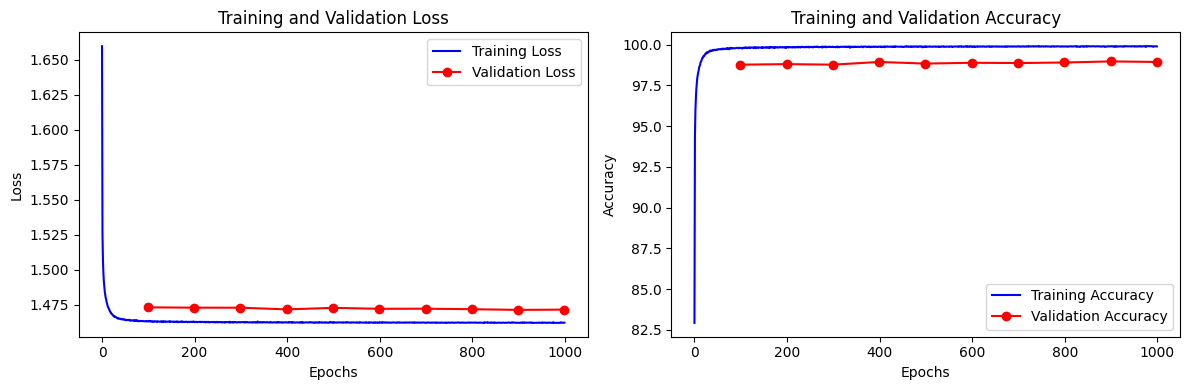

In [7]:
# Your code here

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(total_epochs), train_losses, label='Training Loss', color='blue')
plt.plot(range(99, total_epochs, 100), val_losses, label='Validation Loss', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(total_epochs), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(99, total_epochs, 100), val_accuracies, label='Validation Accuracy', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# After all training epochs are completed, test on the test dataset
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False) # Create a DataLoader for the test dataset
test_losses = []       # List to store test losses for each epoch
test_accuracies = []   # List to store test accuracies for each epoch

# Since there's only one epoch mentioned for testing, we loop once
for epoch in range(1):
    # Evaluate the model on the test dataset and get the test loss and accuracy
    test_loss, test_accuracy = test(model, test_loader, criterion, device)
    test_losses.append(test_loss)            # Append the test loss to the list
    test_accuracies.append(test_accuracy)    # Append the test accuracy to the list
    # Print the test loss and accuracy for the current epoch
    print("epoch", epoch, 'test_loss', test_loss, "test_accuracies", test_accuracy)

# Print the final test accuracy
print(f'Final Test Accuracy: {test_accuracies[-1]:.2f}%')


epoch 0 test_loss 1.4708676666021347 test_accuracies 99.02
Final Test Accuracy: 99.02%
